# Predict if an industry experienced student enrolled in a course is interested in a job change

Zeta Analytics is a training institute that conducts training for analytics/ data science and wants to expand its business to manpower recruitment as well. They get a large number of signups for their training. Now, Zeta Analytics wants to connect these enrollees with their clients who are looking to hire employees working in the same domain. Before that, it is important to know which of these candidates are looking for new employment. They have student information related to demographics, education, experience, and features related to training as well.

To understand the factors that lead a person to look for a job change, the agency wants you to design a model that uses the current credentials/demographics/experience to predict the probability of an enrollee looking for a new job ( 0 or 1).

# Step 1 :- load data file and import modules

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
data=pd.read_csv('../Notebooks/Zeta_Analytics Dataset.csv')

In [179]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [181]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
enrollee_id,18359.0,16729.360096,9643.749725,1.000,8378.500,16706.00,25148.50,33380.000
city_development_index,18359.0,0.847140,0.110189,0.448,0.796,0.91,0.92,0.949
training_hours,18359.0,65.899014,60.885300,1.000,23.000,47.00,89.00,336.000
target,18359.0,0.132088,0.338595,0.000,0.000,0.00,0.00,1.000


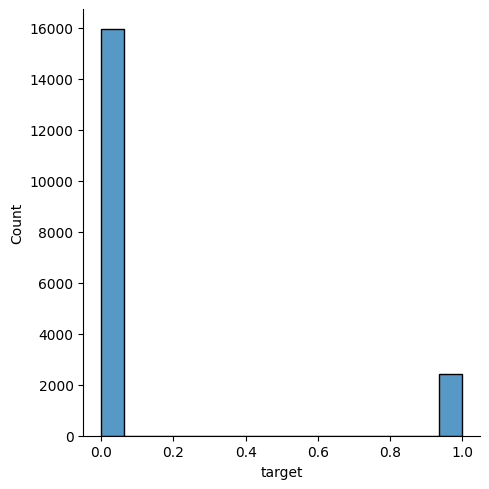

In [182]:
sns.displot(data,x='target')

we can see in above plot , our dataset is unbalanced !

# Step 2 :- Data Preprocessing

1) Let's fix null values 1st

let's see details of column who have null values :- 

In [187]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

let's fill the nan values of categorical column with 'NA' means not available !

In [189]:
column_list_nan=data.columns[data.isnull().any()]
column_list_nan

Index(['gender', 'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job'],
      dtype='object')

above all columns are categorical type except 2 :- experience and last_new_job

In [191]:
cat_column_list_nan=['gender', 'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type']

In [192]:
data[cat_column_list_nan]=data[cat_column_list_nan].fillna('NA')

In [193]:
data.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university         0
education_level             0
major_discipline            0
experience                 59
company_size                0
company_type                0
last_new_job              367
training_hours              0
target                      0
dtype: int64

Let's start working on another 2 columns !

In [195]:
data['experience'].unique()

array(['3', '14', '6', '8', '>20', '4', '9', '15', '10', '1', '5', '16',
       '11', '12', '7', '2', '13', '<1', '19', '18', '17', nan, '20'],
      dtype=object)

In [196]:
data['last_new_job'].unique()

array(['1', '2', '3', '>4', 'never', '4', nan], dtype=object)

let's replace the text data from above columns so then we will convert these object columns in numerical type.

In [198]:
data['experience']=data['experience'].replace('>','',regex=True).replace('<','',regex=True)

In [199]:
data['last_new_job']=data['last_new_job'].replace('>','',regex=True)

In [200]:
data['last_new_job']=data['last_new_job'].replace('never','0')

In [201]:
data['experience'].unique()

array(['3', '14', '6', '8', '20', '4', '9', '15', '10', '1', '5', '16',
       '11', '12', '7', '2', '13', '19', '18', '17', nan], dtype=object)

In [202]:
data['last_new_job'].unique()

array(['1', '2', '3', '4', '0', nan], dtype=object)

In [203]:
data.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university         0
education_level             0
major_discipline            0
experience                 59
company_size                0
company_type                0
last_new_job              367
training_hours              0
target                      0
dtype: int64

Let's convert textual column in numerical column mainly experience and last_new_job.

In [205]:
data['experience']=pd.to_numeric(data['experience'])

In [206]:
data['experience']

0         3.0
1        14.0
2         6.0
3        14.0
4         8.0
         ... 
18354     5.0
18355    15.0
18356    11.0
18357    20.0
18358    20.0
Name: experience, Length: 18359, dtype: float64

In [207]:
data['last_new_job']=pd.to_numeric(data['last_new_job'])
data['last_new_job']

0        1.0
1        1.0
2        2.0
3        1.0
4        2.0
        ... 
18354    1.0
18355    1.0
18356    3.0
18357    3.0
18358    2.0
Name: last_new_job, Length: 18359, dtype: float64

so we converted these columns in numerical type, only remainder is to fill nan values.

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  18359 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18359 non-null  object 
 6   education_level         18359 non-null  object 
 7   major_discipline        18359 non-null  object 
 8   experience              18300 non-null  float64
 9   company_size            18359 non-null  object 
 10  company_type            18359 non-null  object 
 11  last_new_job            17992 non-null  float64
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(3), int64(3), object(8)
mem

# removing unnessasary features from our dataset.

In our dataset , enrollee_id and city will not play any role to decide our target so we should remove from our data set.

In [212]:
data['city'].unique() 

array(['city_149', 'city_83', 'city_16', 'city_64', 'city_100', 'city_21',
       'city_114', 'city_103', 'city_97', 'city_160', 'city_65',
       'city_90', 'city_75', 'city_136', 'city_159', 'city_67', 'city_28',
       'city_10', 'city_73', 'city_76', 'city_104', 'city_27', 'city_30',
       'city_61', 'city_99', 'city_41', 'city_142', 'city_9', 'city_116',
       'city_128', 'city_74', 'city_69', 'city_1', 'city_176', 'city_40',
       'city_123', 'city_152', 'city_165', 'city_89', 'city_36',
       'city_44', 'city_46', 'city_45', 'city_134', 'city_93', 'city_180',
       'city_162', 'city_84', 'city_138', 'city_173', 'city_19',
       'city_71', 'city_158', 'city_23', 'city_102', 'city_105',
       'city_91', 'city_11', 'city_13', 'city_57', 'city_20', 'city_14',
       'city_37', 'city_115', 'city_50', 'city_167', 'city_12',
       'city_143', 'city_126', 'city_77', 'city_101', 'city_150',
       'city_179', 'city_107', 'city_175', 'city_146', 'city_98',
       'city_166', 'city

we can see how many unique values are there , so good to drop it.

In [214]:
data.drop(['city','enrollee_id'],axis=1,inplace=True)

In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  18359 non-null  float64
 1   gender                  18359 non-null  object 
 2   relevent_experience     18359 non-null  object 
 3   enrolled_university     18359 non-null  object 
 4   education_level         18359 non-null  object 
 5   major_discipline        18359 non-null  object 
 6   experience              18300 non-null  float64
 7   company_size            18359 non-null  object 
 8   company_type            18359 non-null  object 
 9   last_new_job            17992 non-null  float64
 10  training_hours          18359 non-null  int64  
 11  target                  18359 non-null  int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 1.7+ MB


# Let's convert our Object column into binary coded 

In [217]:
obj_col=data.select_dtypes(include='O').columns
obj_col

Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_size', 'company_type'],
      dtype='object')

In [218]:
for col in obj_col:
    print(f'{col} :- {data[col].unique()}')
    print(data[col].nunique())

gender :- ['Male' 'NA' 'Female' 'Other']
4
relevent_experience :- ['Has relevent experience' 'No relevent experience']
2
enrolled_university :- ['no_enrollment' 'Full time course' 'Part time course' 'NA']
4
education_level :- ['Graduate' 'Masters' 'High School' 'Phd' 'NA' 'Primary School']
6
major_discipline :- ['STEM' 'Other' 'No Major' 'NA' 'Business Degree' 'Arts' 'Humanities']
7
company_size :- ['100-500' '<10' '50-99' 'NA' '5000-9999' '10000+' '1000-4999' '500-999'
 '10/49']
9
company_type :- ['Pvt Ltd' 'Funded Startup' 'Public Sector' 'NA' 'Early Stage Startup'
 'NGO' 'Other']
7


# Note
Ordinal Encoding is suitable for features with natural order (like education level or company size).
One-Hot Encoding is suitable for features with no inherent order (like gender or major discipline). OR we can use pandas module method getdummies to achive our goal.

In [220]:
from sklearn.preprocessing import OrdinalEncoder

In [221]:
encoder=OrdinalEncoder(categories=[['Graduate', 'Masters' ,'High School' ,'Phd' ,'NA', 'Primary School']])
#categories in [[]] reflect that input will be 2-D array or dataframe

In [222]:
data['education_level']=encoder.fit_transform(data[['education_level']])

In [223]:
encoder=OrdinalEncoder(categories=[['100-500', '<10' ,'50-99', 'NA', '5000-9999', '10000+' ,'1000-4999', '500-999','10/49']])
data['company_size']=encoder.fit_transform(data[['company_size']])

In [224]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  18359 non-null  float64
 1   gender                  18359 non-null  object 
 2   relevent_experience     18359 non-null  object 
 3   enrolled_university     18359 non-null  object 
 4   education_level         18359 non-null  float64
 5   major_discipline        18359 non-null  object 
 6   experience              18300 non-null  float64
 7   company_size            18359 non-null  float64
 8   company_type            18359 non-null  object 
 9   last_new_job            17992 non-null  float64
 10  training_hours          18359 non-null  int64  
 11  target                  18359 non-null  int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 1.7+ MB


Now time to convert other object columns into coded form.we will use pandas method.

In [226]:
obj_col=data.select_dtypes(include='O').columns
obj_col

Index(['gender', 'relevent_experience', 'enrolled_university',
       'major_discipline', 'company_type'],
      dtype='object')

In [227]:
for col in obj_col:
   data=pd.concat([data,pd.get_dummies(data[col],drop_first=True)],axis=1)

In [268]:
data.drop(obj_col,axis=1,inplace=True)

In [270]:
data.head()

,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,Male,NA,Other,...,NA,No Major,Other,STEM,Funded Startup,NA,NGO,Other,Public Sector,Pvt Ltd
0,0.689,0.0,3.0,0.0,1.0,106,0,True,False,False,...,False,False,False,True,False,False,False,False,False,True
1,0.923,0.0,14.0,1.0,1.0,69,0,True,False,False,...,False,False,False,True,True,False,False,False,False,False
2,0.910,0.0,6.0,2.0,2.0,4,0,False,True,False,...,False,False,False,True,False,False,False,False,True,False
3,0.666,0.0,14.0,2.0,1.0,26,0,True,False,False,...,False,False,False,True,False,False,False,False,False,True
4,0.887,1.0,8.0,3.0,2.0,88,1,False,True,False,...,False,False,False,True,False,True,False,False,False,False


Now only nan value remaining to handle.

# Step 3 :- Preparing training and testing dataset and normalization

In [293]:
from sklearn.model_selection import train_test_split
import torch
from sklearn.preprocessing import MinMaxScaler

In [276]:
x=data.drop('target',axis=1)
y=data['target']

In [278]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Let's fill the nan value of last_new_job and experience column
filled by median value of train data set to avoid data leakage!

In [281]:
nan_col=data.columns[data.isnull().any()]
nan_col

Index(['experience', 'last_new_job'], dtype='object')

In [287]:
for col in nan_col:
    median=X_train[col].median()
    X_train[col]=X_train[col].fillna(median)
    X_test[col]=X_test[col].fillna(median)

In [289]:
X_train.isnull().sum()

city_development_index    0
education_level           0
experience                0
company_size              0
last_new_job              0
training_hours            0
Male                      0
NA                        0
Other                     0
No relevent experience    0
NA                        0
Part time course          0
no_enrollment             0
Business Degree           0
Humanities                0
NA                        0
No Major                  0
Other                     0
STEM                      0
Funded Startup            0
NA                        0
NGO                       0
Other                     0
Public Sector             0
Pvt Ltd                   0
dtype: int64

In [311]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train) #it normalize and also convert in 
X_test=scaler.transform(X_test)
print(type(X_train))
y_train=y_train.values
y_test=y_test.values
y_test.shape # we need to reshape our numpy array to (3672,1)
y_test.reshape(-1,1)

<class 'numpy.ndarray'>
3672


# Step 4:- Creating tensor input , preparing model

In [313]:
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset,DataLoader,Dataset
import torch.optim as optim
from sklearn.metrics import roc_auc_score

# a)Let's convert our data (numpy array) into tensor

In [316]:
X_train_tensor=torch.tensor(X_train,dtype=torch.float32)
X_test_tensor=torch.tensor(X_test,dtype=torch.float32)
y_train_tensor=torch.tensor(y_train,dtype=torch.float32)
y_test_tensor=torch.tensor(y_test,dtype=torch.float32)

In [318]:
type(X_train_tensor)

torch.Tensor

# b)Let's create our custome class to prepare dataset 
it is like to same as TensorDataset.

In [337]:
class prepareDataset(Dataset):
    def __init__(self,features,lables):
      #  if isinstance(features,torch.tensor):
            self.features=features
      #  else :
        #    features=torch.tensor(features,torch.float32)
         #   self.features=features
     #   if isinstance(lables,torch.tensor):
            self.lables=lables
     #   else :
       #     lables=torch.tensor(lables,torch.float32)
            self.lables=lables

    def __len__(self):
        return len(self.features)

    def __getitem__(self,index):
        return self.features[index],self.lables[index]
    

defining the __init__, __len__, and __getitem__ methods is compulsory when creating a custom dataset class that inherits from PyTorch's Dataset class. These methods define the structure and behavior of the dataset, making it compatible with PyTorch's DataLoader

# c)Let's create our model class

In [333]:
class BinaryClassifierModel(nn.Module):
    def __init__(self):
        super(BinaryClassifierModel,self).__init__()
        self.l1=nn.Linear(X_train.shape[1],256)
        self.l2=nn.Linear(256,128)
        self.l3=nn.Linear(128,64)
        self.l4=nn.Linear(64,1)

    def forward(self,x):
        x=F.relu(self.l1(x))
        x=F.relu(self.l2(x))
        x=F.relu(self.l3(x))
        x=F.sigmoid(self.l4(x))
        return x;

# d)Let's create function for training and evaluation 

In [345]:
def train_and_evaluate_model(model,optimizer,batch_size=128,epochs=25,print_every=5,patience=5,clip_value=1.0):
    model.train() #set model to train mode
    train_loss_list=[]
    test_loss_list=[]

    #Convert tensor data into torch dataset
    train_dataset=prepareDataset(X_train_tensor,y_train_tensor)
    test_dataset=prepareDataset(X_test_tensor,y_test_tensor)
    #Let's create data loader
    train_loader=DataLoader(train_dataset,batch_size,shuffle=True)
    test_loader=DataLoader(test_dataset,batch_size,shuffle=True)
    #let's prepare loss function
    criterion=nn.BCELoss()

    #Variable for early stopping
    best_test_loss=float('inf')
    patience_counter=0

    # Train for the defined number of epochs
    for epoch in range(epochs):
        train_loss=0.0
        for X,Y in test_loader:
            optimizer.zero_grad() # Clear the gradients of all optimized variables
            y_pred=model(X)
            loss=criterion(y_pred.squeeze(),Y)
            loss.backward()
            optimizer.step()
            train_loss +=loss.item()

        #Calculating avg training loss for the current epoch
        train_loss /=len(train_loader)
        train_loss_list.append(train_loss)

        #Evaluate the model on the test set
        model.eval() # set the model to evaluation mode
        test_loss=0.0
        with torch.no_grad(): #disable gradient computation for saving memory
            for X,Y in test_loader:
                y_pred=model(X)
                loss=criterion(y_pred.squeeze(),Y)
                test_loss +=loss

            test_loss /=len(test_loader) #to calculate avg
            test_loss_list.append(test_loss)

            #calculate AUC score for every epoch
            train_auc=roc_auc_score(y_train,model(X_train_tensor).detach().squeeze().numpy())
            test_auc=roc_auc_score(y_test,model(X_test_tensor).detach().squeeze().numpy())
            #print progress
            if (epoch+1)%print_every==0:
                print(f'epoch :-{epoch+1}==> train loss :- {train_loss:.4f} , test loss:- {test_loss:.4f} , AUC train score :- {train_auc:.4f} , AUC test score :- {test_auc:.4f}')
    
    #after all epoch , let's plot train and test loss
    plt.figure(figsize=(10,6))
    plt.plot(range(epochs),train_loss_list,label='Train loss')
    plt.plot(range(epochs),test_loss_list,label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.title('Training and Test Loss over Epochs')
    plt.legend()
    plt.show()
            
    

# Step 5 :- let's train and test the model

epoch :-10==> train loss :- 0.0980 , test loss:- 0.3880 , AUC train score :- 0.6186 , AUC test score :- 0.6245
epoch :-20==> train loss :- 0.0969 , test loss:- 0.3816 , AUC train score :- 0.6313 , AUC test score :- 0.6447
epoch :-30==> train loss :- 0.0955 , test loss:- 0.3779 , AUC train score :- 0.6389 , AUC test score :- 0.6626
epoch :-40==> train loss :- 0.0947 , test loss:- 0.3742 , AUC train score :- 0.6392 , AUC test score :- 0.6738
epoch :-50==> train loss :- 0.0942 , test loss:- 0.3734 , AUC train score :- 0.6366 , AUC test score :- 0.6800
epoch :-60==> train loss :- 0.0937 , test loss:- 0.3712 , AUC train score :- 0.6348 , AUC test score :- 0.6856
epoch :-70==> train loss :- 0.0933 , test loss:- 0.3694 , AUC train score :- 0.6335 , AUC test score :- 0.6912
epoch :-80==> train loss :- 0.0926 , test loss:- 0.3656 , AUC train score :- 0.6330 , AUC test score :- 0.6973
epoch :-90==> train loss :- 0.0922 , test loss:- 0.3653 , AUC train score :- 0.6312 , AUC test score :- 0.7044
e

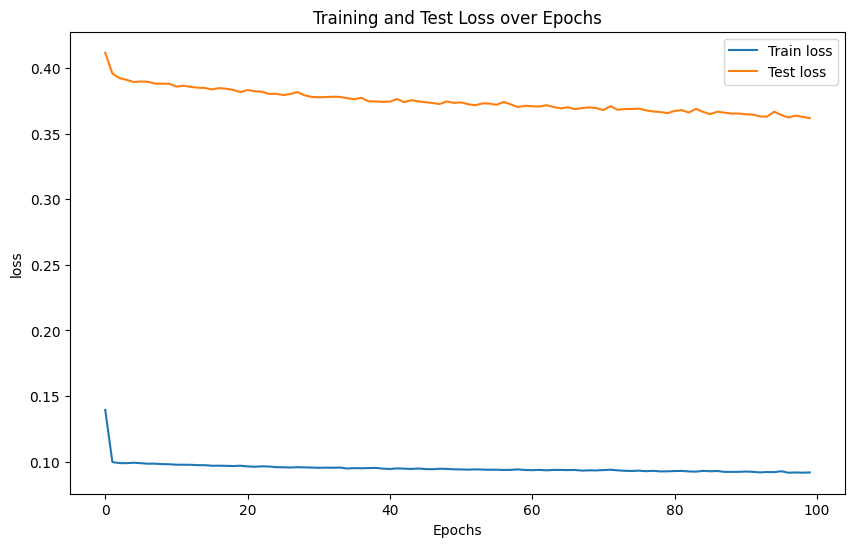

In [347]:
model=BinaryClassifierModel() #create instance

opt=optim.SGD(model.parameters(),lr=0.01,momentum=0.9,nesterov=True)

train_and_evaluate_model(model,opt,epochs=100,print_every=10)

epoch :-10==> train loss :- 0.0927 , test loss:- 0.3654 , AUC train score :- 0.6263 , AUC test score :- 0.7104
epoch :-20==> train loss :- 0.0870 , test loss:- 0.3333 , AUC train score :- 0.6137 , AUC test score :- 0.7685
epoch :-30==> train loss :- 0.0783 , test loss:- 0.2974 , AUC train score :- 0.5884 , AUC test score :- 0.8188
epoch :-40==> train loss :- 0.0710 , test loss:- 0.2694 , AUC train score :- 0.5723 , AUC test score :- 0.8513
epoch :-50==> train loss :- 0.0676 , test loss:- 0.2617 , AUC train score :- 0.5665 , AUC test score :- 0.8688
epoch :-60==> train loss :- 0.0618 , test loss:- 0.2367 , AUC train score :- 0.5531 , AUC test score :- 0.8862
epoch :-70==> train loss :- 0.0559 , test loss:- 0.2136 , AUC train score :- 0.5559 , AUC test score :- 0.9103
epoch :-80==> train loss :- 0.0544 , test loss:- 0.2009 , AUC train score :- 0.5428 , AUC test score :- 0.9222
epoch :-90==> train loss :- 0.0494 , test loss:- 0.2035 , AUC train score :- 0.5268 , AUC test score :- 0.9326
e

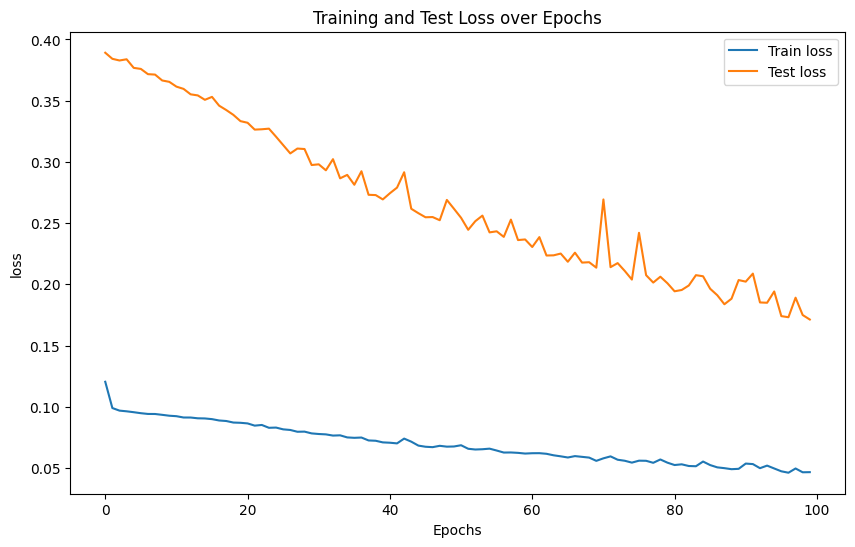

In [349]:
model = BinaryClassifierModel()
# Initialize SGD optimizer
opt = optim.Adam(model.parameters())
# Train using optimizer_sgd
train_and_evaluate_model(model, opt, epochs=100, print_every=10)

# Key-Observations:
1. SGD with Nesterov Momentum:
Gradual Improvement: Training and test losses decrease very slowly across epochs, and AUC scores improve gradually.
Lower AUC Scores: Even after 100 epochs, the test AUC is 0.7126, which suggests that the model is learning but very slowly.
Underfitting Indications: The train AUC remains low throughout, suggesting the model struggles to capture patterns in the data.
2. Adam Optimizer:
Rapid Convergence: Training and test losses decrease significantly within fewer epochs compared to SGD.
Higher AUC Scores: Test AUC improves significantly, reaching 0.9488 after 100 epochs, which is a substantial improvement over SGD.
Potential Overfitting: Train AUC remains relatively low, while the test AUC climbs rapidly, which might indicate a lack of generalization over time.

# Why Is This Happening?
1. SGD with Momentum:
SGD with Nesterov momentum requires careful tuning of learning rates and momentum parameters. It often converges slower than Adam, especially in deep models or complex datasets.
The slower improvement and lower AUC scores suggest that the learning rate or model architecture may not be optimal.
2. Adam Optimizer:
Adam adapts the learning rate for each parameter based on gradient moments, which helps it converge faster, especially in noisy or complex loss landscapes.
The rapid decrease in loss and increase in test AUC show that Adam is effectively capturing the patterns in your data.
However, the lower train AUC suggests that the model might not be learning effectively from training data or that the data itself might not be fully representative.

# Step 6 :- Applying Technique to reduce Overfitting 

# a) Apply dropout layer + Normalization between layers + Leaky Relu

In [358]:
class BinaryClassifierImprovement(nn.Module):
    def __init__(self):
        super(BinaryClassifierImprovement,self).__init__()
        self.l1=nn.Linear(X_train.shape[1],256)
        self.n1=nn.BatchNorm1d(256)
        self.d1=nn.Dropout(0.5)

        self.l2=nn.Linear(256,128)
        self.n2=nn.BatchNorm1d(128)
        self.d2=nn.Dropout(0.5)

        self.l3=nn.Linear(128,64)
        self.n3=nn.BatchNorm1d(64)
        self.d3=nn.Dropout(0.5)

        self.l4=nn.Linear(64,1)

    def forward(self,x):
        x=F.leaky_relu(self.n1(self.l1(x)),negative_slope=0.01)
        x=self.d1(x)
        x=F.leaky_relu(self.n2(self.l2(x)),negative_slope=0.01)
        x=self.d2(x)
        x=F.leaky_relu(self.n3(self.l3(x)),negative_slope=0.01)
        x=self.d3(x)
        x=torch.sigmoid(self.l4(x))
        return x

epoch :-10==> train loss :- 0.0906 , test loss:- 0.3515 , AUC train score :- 0.6310 , AUC test score :- 0.7418
epoch :-20==> train loss :- 0.0824 , test loss:- 0.3101 , AUC train score :- 0.6063 , AUC test score :- 0.8170
epoch :-30==> train loss :- 0.0702 , test loss:- 0.2541 , AUC train score :- 0.5760 , AUC test score :- 0.8832
epoch :-40==> train loss :- 0.0575 , test loss:- 0.2089 , AUC train score :- 0.5639 , AUC test score :- 0.9239
epoch :-50==> train loss :- 0.0480 , test loss:- 0.1818 , AUC train score :- 0.5444 , AUC test score :- 0.9474
epoch :-60==> train loss :- 0.0440 , test loss:- 0.1526 , AUC train score :- 0.5453 , AUC test score :- 0.9639
epoch :-70==> train loss :- 0.0356 , test loss:- 0.1286 , AUC train score :- 0.5484 , AUC test score :- 0.9735
epoch :-80==> train loss :- 0.0314 , test loss:- 0.1127 , AUC train score :- 0.5291 , AUC test score :- 0.9824
epoch :-90==> train loss :- 0.0289 , test loss:- 0.0955 , AUC train score :- 0.5244 , AUC test score :- 0.9883
e

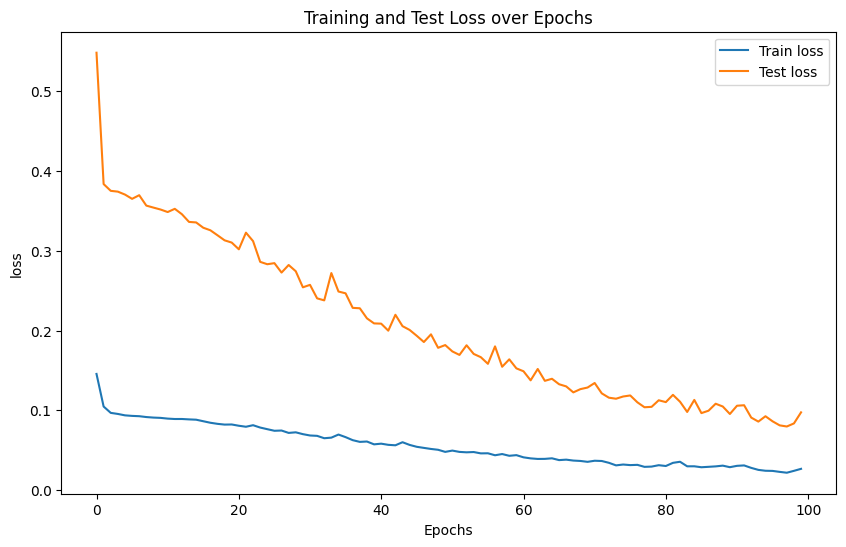

In [360]:
model2=BinaryClassifierImprovement()
opti=optim.Adam(model2.parameters())
train_and_evaluate_model(model2,opti,epochs=100,print_every=10)

our model is performing excellently on the test set due to the integration of dropout, batch normalization, and Leaky ReLU. The high AUC test scores indicate a very capable model for generalization, though fine-tuning hyperparameters might improve the training metrics further. This approach can be a strong baseline for more complex datasets.

# b) applying L2 regularization 

epoch :-10==> train loss :- 0.0907 , test loss:- 0.3513 , AUC train score :- 0.6308 , AUC test score :- 0.7401
epoch :-20==> train loss :- 0.0825 , test loss:- 0.3114 , AUC train score :- 0.6073 , AUC test score :- 0.8156
epoch :-30==> train loss :- 0.0709 , test loss:- 0.2585 , AUC train score :- 0.5829 , AUC test score :- 0.8807
epoch :-40==> train loss :- 0.0596 , test loss:- 0.2234 , AUC train score :- 0.5679 , AUC test score :- 0.9184
epoch :-50==> train loss :- 0.0510 , test loss:- 0.1796 , AUC train score :- 0.5427 , AUC test score :- 0.9513
epoch :-60==> train loss :- 0.0391 , test loss:- 0.1392 , AUC train score :- 0.5353 , AUC test score :- 0.9747
epoch :-70==> train loss :- 0.0348 , test loss:- 0.1137 , AUC train score :- 0.5506 , AUC test score :- 0.9809
epoch :-80==> train loss :- 0.0308 , test loss:- 0.1397 , AUC train score :- 0.5242 , AUC test score :- 0.9767
epoch :-90==> train loss :- 0.0261 , test loss:- 0.0889 , AUC train score :- 0.5369 , AUC test score :- 0.9901
e

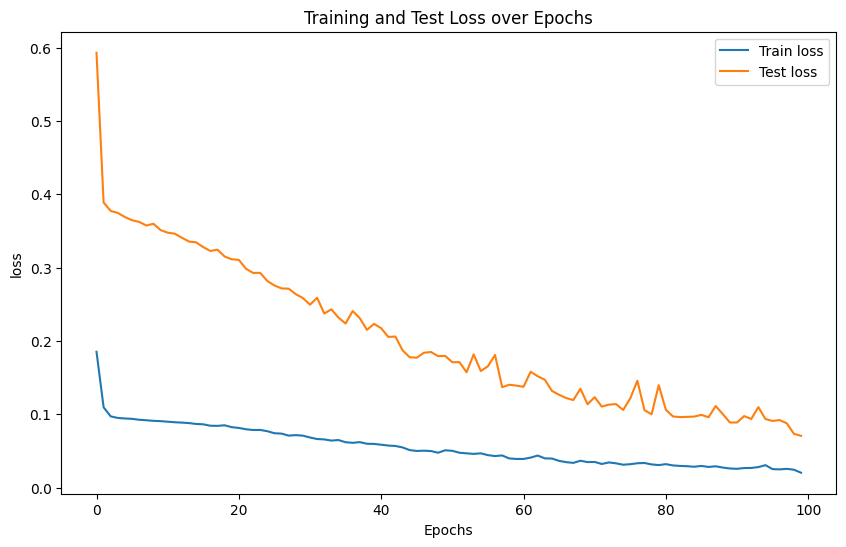

In [364]:
model2=BinaryClassifierImprovement()
opti=optim.Adam(model2.parameters(),weight_decay=1e-5)
train_and_evaluate_model(model2,opti,epochs=100,print_every=10)

we can see slight improvement !

# c) applying early stopping 

In [425]:
def train_and_evaluate_model(model,optimizer,batch_size=128,epochs=25,print_every=5,patience=5,clip_value=1.0):
    model.train() #set model to train mode
    train_loss_list=[]
    test_loss_list=[]

    #Convert tensor data into torch dataset
    train_dataset=prepareDataset(X_train_tensor,y_train_tensor)
    test_dataset=prepareDataset(X_test_tensor,y_test_tensor)
    #Let's create data loader
    train_loader=DataLoader(train_dataset,batch_size,shuffle=True)
    test_loader=DataLoader(test_dataset,batch_size,shuffle=True)
    #let's prepare loss function
    criterion=nn.BCELoss()

    #Variable for early stopping
    best_test_loss=float('inf')
    patience_counter=0
    max_patience=10
    plot_count=0
    # Train for the defined number of epochs
    for epoch in range(epochs):
        train_loss=0.0
        for X,Y in test_loader:
            optimizer.zero_grad() # Clear the gradients of all optimized variables
            y_pred=model(X)
            loss=criterion(y_pred.squeeze(),Y)
            loss.backward()
            optimizer.step()
            train_loss +=loss.item()

        #Calculating avg training loss for the current epoch
        train_loss /=len(train_loader)
        train_loss_list.append(train_loss)

        #Evaluate the model on the test set
        model.eval() # set the model to evaluation mode
        test_loss=0.0
        with torch.no_grad(): #disable gradient computation for saving memory
            for X,Y in test_loader:
                y_pred=model(X)
                loss=criterion(y_pred.squeeze(),Y)
                test_loss +=loss

            test_loss /=len(test_loader) #to calculate avg
            test_loss_list.append(test_loss)
            
            #calculate AUC score for every epoch
            train_auc=roc_auc_score(y_train,model(X_train_tensor).detach().squeeze().numpy())
            test_auc=roc_auc_score(y_test,model(X_test_tensor).detach().squeeze().numpy())
            #print progress
            if (epoch+1)%print_every==0:
                print(f'epoch :-{epoch+1}==> train loss :- {train_loss:.4f} , test loss:- {test_loss:.4f} , AUC train score :- {train_auc:.4f} , AUC test score :- {test_auc:.4f}')
        plot_count +=1
        #applying oncept of early stop
        if best_test_loss > test_loss :
            best_test_loss=test_loss
            patience=0
        else :
            patience +=1
        if patience >=max_patience:
            print(f'EARLY STOPPING TRIGGERED AT EPOCH :- {epoch+1}')
            break;
    #after all epoch , let's plot train and test loss
    plt.figure(figsize=(10,6))
    plt.plot(range(plot_count),train_loss_list,label='Train loss')
    plt.plot(range(plot_count),test_loss_list,label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.title('Training and Test Loss over Epochs')
    plt.legend()
    plt.show()
            
    

epoch :-10==> train loss :- 0.0915 , test loss:- 0.3550 , AUC train score :- 0.6363 , AUC test score :- 0.7335
epoch :-20==> train loss :- 0.0842 , test loss:- 0.3141 , AUC train score :- 0.6123 , AUC test score :- 0.8138
epoch :-30==> train loss :- 0.0732 , test loss:- 0.2639 , AUC train score :- 0.5812 , AUC test score :- 0.8735
epoch :-40==> train loss :- 0.0595 , test loss:- 0.2151 , AUC train score :- 0.5534 , AUC test score :- 0.9224
epoch :-50==> train loss :- 0.0489 , test loss:- 0.1812 , AUC train score :- 0.5591 , AUC test score :- 0.9484
epoch :-60==> train loss :- 0.0433 , test loss:- 0.1432 , AUC train score :- 0.5393 , AUC test score :- 0.9717
epoch :-70==> train loss :- 0.0357 , test loss:- 0.1335 , AUC train score :- 0.5310 , AUC test score :- 0.9718
epoch :-80==> train loss :- 0.0323 , test loss:- 0.1134 , AUC train score :- 0.5372 , AUC test score :- 0.9824
epoch :-90==> train loss :- 0.0285 , test loss:- 0.1057 , AUC train score :- 0.5182 , AUC test score :- 0.9856
e

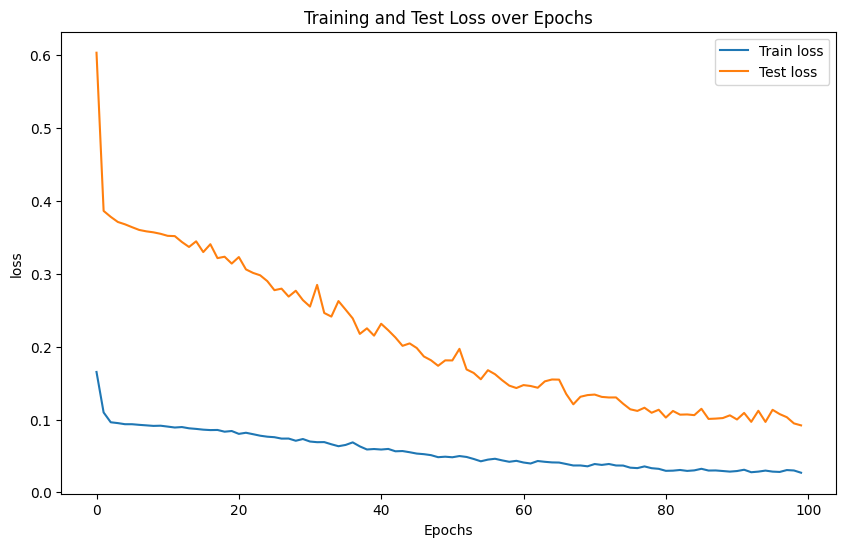

In [370]:
model2=BinaryClassifierImprovement()
opti=optim.Adam(model2.parameters(),weight_decay=1e-5)
train_and_evaluate_model(model2,opti,epochs=100,print_every=10)

# d) Applying hyperparameter tuning by Optuna library

Tuning hyperparameters with the Optuna package is an efficient and automated way to find the optimal parameters for your machine learning or deep learning models

Define the Objective Function
The objective function is the core of the Optuna optimization process. It defines:

Your model's architecture or configuration.
How the hyperparameters should be sampled.
The evaluation metric to be minimized or maximized.

In [375]:
# 1. import library 
import optuna

In [377]:
# 2. define the model with the hyperparameter as function argument , it will be putting by optuna

class BinaryClassifierDropoutOptuna(nn.Module):
    def __init__(self,num_features,num_classes,dropout_rate,num_layers,num_nodes):
        super(BinaryClassifierDropoutOptuna,self).__init__()
        layers=[]
        prev_nodes=num_features

        #Dynamically create layers based on num_layers and num_nodes
        for i in range(num_layers):
            layers.append(nn.Linear(prev_nodes,num_nodes)) #fix intermediate nodes
            layers.append(nn.LeakyReLU())
            layers.append(nn.Dropout(dropout_rate))
            layers.append(nn.BatchNorm1d(num_nodes))
            prev_nodes=num_nodes

        #output layer
        layers.append(nn.Linear(prev_nodes,num_classes))
        self.layers=nn.Sequential(*layers)
        #In Python, the * operator is used to unpack a collection (like a list or tuple) into individual elements. When used in function calls, it allows passing each element of a list (or tuple) as separate arguments.

    def forward(self,x):
        x=self.layers(x)
        x=torch.sigmoid(x)
        return x

In [403]:
# 3. define the training and evaluation model who return AUC score , bcoz we want to maimze it
def train_and_evaluate_model_optuna(model, optimizer,batch_size=128,epochs=25,print_every=5,show_plot=False):
    model.train()

    train_loss_list = []
    test_loss_list = []

    train_dataset = prepareDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

    test_dataset = prepareDataset(X_test_tensor, y_test_tensor)
    test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

    criterion = nn.BCELoss()

    for epoch in range(epochs):
        train_loss = 0.0
        model.train()
        for features, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs.squeeze(), labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_loss_list.append(train_loss)

        model.eval()
        test_loss = 0.0
        with torch.no_grad():
            for features, labels in test_loader:
                outputs = model(features)
                loss = criterion(outputs.squeeze(), labels)
                test_loss += loss.item()

        test_loss /= len(test_loader)
        test_loss_list.append(test_loss)

        if (epoch + 1) % print_every == 0:
            print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')
            model.eval()
            with torch.no_grad():
                train_preds = model(X_train_tensor).squeeze()
                test_preds = model(X_test_tensor).squeeze()
                train_auc = roc_auc_score(y_train_tensor.cpu(), train_preds.cpu())
                test_auc = roc_auc_score(y_test_tensor.cpu(), test_preds.cpu())
            print(f'Train AUC: {train_auc:.4f}, Test AUC: {test_auc:.4f}')

    if show_plot:
        plt.plot(range(epochs), train_loss_list, label='train')
        plt.plot(range(epochs), test_loss_list, label='test')
        plt.legend()
        plt.show()

    return train_auc, test_auc

In [399]:
# 4. define Optuna objective function
def objective(trial):
    dropout_rate=trial.suggest_float('dropout_rate',0.1,0.5)
    num_layers=trial.suggest_int('num_layers',2,5)
    num_nodes=trial.suggest_categorical('num_nodes',[64,128]) #will give value from this set
    lr=trial.suggest_float('lr',1e-5,1e-1,log=True)

    model=BinaryClassifierDropoutOptuna(num_features=X_train.shape[1],num_classes=1,dropout_rate=dropout_rate,num_layers=num_layers,num_nodes=num_nodes)
    optimizer=optim.Adam(model.parameters(),lr=lr)

    train_auc,test_auc=train_and_evaluate_model_optuna(model,optimizer,epochs=30,print_every=5)
    return test_auc



In [405]:
# 5. run optuna optimization
study=optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=50)

#6 print the best trial results
print('Best trial :')
trial=study.best_trial
print(" value : ",trial.value)
print(" Params: ")
for key,value in trial.params.items():
    print(f"   {key}: {value}")

[I 2025-01-05 10:49:56,916] A new study created in memory with name: no-name-cfa99f50-21b7-47f8-a99c-cfd8c192f9e0


Epoch 5/30, Train Loss: 0.6610, Test Loss: 0.6192
Train AUC: 0.5536, Test AUC: 0.5651
Epoch 10/30, Train Loss: 0.6314, Test Loss: 0.5932
Train AUC: 0.5793, Test AUC: 0.5872
Epoch 15/30, Train Loss: 0.6023, Test Loss: 0.5705
Train AUC: 0.5988, Test AUC: 0.5987
Epoch 20/30, Train Loss: 0.5751, Test Loss: 0.5453
Train AUC: 0.6095, Test AUC: 0.6008
Epoch 25/30, Train Loss: 0.5455, Test Loss: 0.5144
Train AUC: 0.6141, Test AUC: 0.6062


[I 2025-01-05 10:50:09,192] Trial 0 finished with value: 0.6090693568726355 and parameters: {'dropout_rate': 0.3175972871950522, 'num_layers': 3, 'num_nodes': 64, 'lr': 3.0500587797354592e-05}. Best is trial 0 with value: 0.6090693568726355.


Epoch 30/30, Train Loss: 0.5182, Test Loss: 0.4850
Train AUC: 0.6201, Test AUC: 0.6091
Epoch 5/30, Train Loss: 0.5991, Test Loss: 0.5776
Train AUC: 0.6656, Test AUC: 0.6013
Epoch 10/30, Train Loss: 0.4447, Test Loss: 0.4396
Train AUC: 0.6836, Test AUC: 0.5964
Epoch 15/30, Train Loss: 0.3905, Test Loss: 0.3965
Train AUC: 0.7039, Test AUC: 0.6116
Epoch 20/30, Train Loss: 0.3811, Test Loss: 0.3922
Train AUC: 0.7107, Test AUC: 0.6214
Epoch 25/30, Train Loss: 0.3778, Test Loss: 0.3907
Train AUC: 0.7173, Test AUC: 0.6293


[I 2025-01-05 10:50:28,765] Trial 1 finished with value: 0.6303379571248424 and parameters: {'dropout_rate': 0.10936806407642892, 'num_layers': 5, 'num_nodes': 128, 'lr': 0.00010491806468725578}. Best is trial 1 with value: 0.6303379571248424.


Epoch 30/30, Train Loss: 0.3735, Test Loss: 0.3902
Train AUC: 0.7237, Test AUC: 0.6303
Epoch 5/30, Train Loss: 0.6791, Test Loss: 0.6398
Train AUC: 0.6180, Test AUC: 0.6140
Epoch 10/30, Train Loss: 0.5987, Test Loss: 0.5634
Train AUC: 0.6237, Test AUC: 0.6220
Epoch 15/30, Train Loss: 0.5159, Test Loss: 0.4859
Train AUC: 0.6272, Test AUC: 0.6131
Epoch 20/30, Train Loss: 0.4612, Test Loss: 0.4279
Train AUC: 0.6338, Test AUC: 0.6230
Epoch 25/30, Train Loss: 0.4268, Test Loss: 0.3990
Train AUC: 0.6417, Test AUC: 0.6230


[I 2025-01-05 10:50:39,684] Trial 2 finished with value: 0.6279766708701136 and parameters: {'dropout_rate': 0.4351702724493277, 'num_layers': 3, 'num_nodes': 64, 'lr': 7.554792644887424e-05}. Best is trial 1 with value: 0.6303379571248424.


Epoch 30/30, Train Loss: 0.4134, Test Loss: 0.3898
Train AUC: 0.6464, Test AUC: 0.6280
Epoch 5/30, Train Loss: 0.6845, Test Loss: 0.6375
Train AUC: 0.5335, Test AUC: 0.5233
Epoch 10/30, Train Loss: 0.6612, Test Loss: 0.6212
Train AUC: 0.5542, Test AUC: 0.5415
Epoch 15/30, Train Loss: 0.6406, Test Loss: 0.6050
Train AUC: 0.5595, Test AUC: 0.5455
Epoch 20/30, Train Loss: 0.6219, Test Loss: 0.5859
Train AUC: 0.5741, Test AUC: 0.5619
Epoch 25/30, Train Loss: 0.6052, Test Loss: 0.5725
Train AUC: 0.5779, Test AUC: 0.5660


[I 2025-01-05 10:50:55,277] Trial 3 finished with value: 0.576641235813367 and parameters: {'dropout_rate': 0.3377033460858575, 'num_layers': 5, 'num_nodes': 64, 'lr': 2.0934856253437162e-05}. Best is trial 1 with value: 0.6303379571248424.


Epoch 30/30, Train Loss: 0.5843, Test Loss: 0.5486
Train AUC: 0.5876, Test AUC: 0.5766
Epoch 5/30, Train Loss: 0.6500, Test Loss: 0.6515
Train AUC: 0.6255, Test AUC: 0.6112
Epoch 10/30, Train Loss: 0.5687, Test Loss: 0.5640
Train AUC: 0.6457, Test AUC: 0.6200
Epoch 15/30, Train Loss: 0.4916, Test Loss: 0.4769
Train AUC: 0.6542, Test AUC: 0.6184
Epoch 20/30, Train Loss: 0.4331, Test Loss: 0.4213
Train AUC: 0.6637, Test AUC: 0.6205
Epoch 25/30, Train Loss: 0.4057, Test Loss: 0.3971
Train AUC: 0.6683, Test AUC: 0.6257


[I 2025-01-05 10:51:04,475] Trial 4 finished with value: 0.6299583858764186 and parameters: {'dropout_rate': 0.3159317791376388, 'num_layers': 2, 'num_nodes': 64, 'lr': 7.576658215897133e-05}. Best is trial 1 with value: 0.6303379571248424.


Epoch 30/30, Train Loss: 0.3959, Test Loss: 0.3878
Train AUC: 0.6718, Test AUC: 0.6300
Epoch 5/30, Train Loss: 0.6272, Test Loss: 0.6169
Train AUC: 0.6359, Test AUC: 0.6211
Epoch 10/30, Train Loss: 0.5514, Test Loss: 0.5365
Train AUC: 0.6511, Test AUC: 0.6252
Epoch 15/30, Train Loss: 0.4734, Test Loss: 0.4536
Train AUC: 0.6613, Test AUC: 0.6298
Epoch 20/30, Train Loss: 0.4282, Test Loss: 0.4116
Train AUC: 0.6655, Test AUC: 0.6235
Epoch 25/30, Train Loss: 0.4048, Test Loss: 0.3936
Train AUC: 0.6719, Test AUC: 0.6280


[I 2025-01-05 10:51:15,129] Trial 5 finished with value: 0.6332269861286255 and parameters: {'dropout_rate': 0.45142641515700765, 'num_layers': 2, 'num_nodes': 128, 'lr': 6.408889881589297e-05}. Best is trial 5 with value: 0.6332269861286255.


Epoch 30/30, Train Loss: 0.3986, Test Loss: 0.3874
Train AUC: 0.6770, Test AUC: 0.6332
Epoch 5/30, Train Loss: 0.3846, Test Loss: 0.3850
Train AUC: 0.6777, Test AUC: 0.6416
Epoch 10/30, Train Loss: 0.3722, Test Loss: 0.3861
Train AUC: 0.7007, Test AUC: 0.6363
Epoch 15/30, Train Loss: 0.3679, Test Loss: 0.3883
Train AUC: 0.7119, Test AUC: 0.6422
Epoch 20/30, Train Loss: 0.3625, Test Loss: 0.3938
Train AUC: 0.7291, Test AUC: 0.6241
Epoch 25/30, Train Loss: 0.3588, Test Loss: 0.3978
Train AUC: 0.7320, Test AUC: 0.6316


[I 2025-01-05 10:51:31,186] Trial 6 finished with value: 0.6209899117276168 and parameters: {'dropout_rate': 0.16596694690738906, 'num_layers': 4, 'num_nodes': 128, 'lr': 0.0009735949139658845}. Best is trial 5 with value: 0.6332269861286255.


Epoch 30/30, Train Loss: 0.3567, Test Loss: 0.4017
Train AUC: 0.7468, Test AUC: 0.6210
Epoch 5/30, Train Loss: 0.3818, Test Loss: 0.3869
Train AUC: 0.6561, Test AUC: 0.6369
Epoch 10/30, Train Loss: 0.3790, Test Loss: 0.5988
Train AUC: 0.6609, Test AUC: 0.6304
Epoch 15/30, Train Loss: 0.3767, Test Loss: 0.4118
Train AUC: 0.6687, Test AUC: 0.6416
Epoch 20/30, Train Loss: 0.3818, Test Loss: 0.4115
Train AUC: 0.6677, Test AUC: 0.6395
Epoch 25/30, Train Loss: 0.3758, Test Loss: 0.4375
Train AUC: 0.6663, Test AUC: 0.6447


[I 2025-01-05 10:51:43,442] Trial 7 finished with value: 0.639374527112232 and parameters: {'dropout_rate': 0.20057452159982891, 'num_layers': 4, 'num_nodes': 64, 'lr': 0.061183698428462094}. Best is trial 7 with value: 0.639374527112232.


Epoch 30/30, Train Loss: 0.3754, Test Loss: 0.5462
Train AUC: 0.6720, Test AUC: 0.6394
Epoch 5/30, Train Loss: 0.3746, Test Loss: 0.3881
Train AUC: 0.6579, Test AUC: 0.6353
Epoch 10/30, Train Loss: 0.3738, Test Loss: 0.3890
Train AUC: 0.6651, Test AUC: 0.6285
Epoch 15/30, Train Loss: 0.3736, Test Loss: 0.3844
Train AUC: 0.6687, Test AUC: 0.6423
Epoch 20/30, Train Loss: 0.3718, Test Loss: 0.3900
Train AUC: 0.6749, Test AUC: 0.6359
Epoch 25/30, Train Loss: 0.3723, Test Loss: 0.3881
Train AUC: 0.6771, Test AUC: 0.6504


[I 2025-01-05 10:51:53,087] Trial 8 finished with value: 0.6485189155107188 and parameters: {'dropout_rate': 0.15593091957604052, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.04378196440068933}. Best is trial 8 with value: 0.6485189155107188.


Epoch 30/30, Train Loss: 0.3727, Test Loss: 0.3901
Train AUC: 0.6778, Test AUC: 0.6485
Epoch 5/30, Train Loss: 0.4648, Test Loss: 0.4174
Train AUC: 0.6306, Test AUC: 0.5989
Epoch 10/30, Train Loss: 0.4029, Test Loss: 0.3880
Train AUC: 0.6519, Test AUC: 0.6166
Epoch 15/30, Train Loss: 0.3908, Test Loss: 0.3878
Train AUC: 0.6620, Test AUC: 0.6213
Epoch 20/30, Train Loss: 0.3857, Test Loss: 0.3858
Train AUC: 0.6686, Test AUC: 0.6330
Epoch 25/30, Train Loss: 0.3817, Test Loss: 0.3853
Train AUC: 0.6723, Test AUC: 0.6346


[I 2025-01-05 10:52:02,569] Trial 9 finished with value: 0.6368341740226986 and parameters: {'dropout_rate': 0.46366849032762536, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.000305804879141012}. Best is trial 8 with value: 0.6485189155107188.


Epoch 30/30, Train Loss: 0.3782, Test Loss: 0.3851
Train AUC: 0.6756, Test AUC: 0.6368
Epoch 5/30, Train Loss: 0.3769, Test Loss: 0.3878
Train AUC: 0.6612, Test AUC: 0.6449
Epoch 10/30, Train Loss: 0.3770, Test Loss: 0.4132
Train AUC: 0.6663, Test AUC: 0.6452
Epoch 15/30, Train Loss: 0.3795, Test Loss: 0.4371
Train AUC: 0.6597, Test AUC: 0.6439
Epoch 20/30, Train Loss: 0.3780, Test Loss: 0.4109
Train AUC: 0.6631, Test AUC: 0.6442
Epoch 25/30, Train Loss: 0.3803, Test Loss: 0.4139
Train AUC: 0.6618, Test AUC: 0.6360


[I 2025-01-05 10:52:15,452] Trial 10 finished with value: 0.6376525851197982 and parameters: {'dropout_rate': 0.2226818069577131, 'num_layers': 3, 'num_nodes': 128, 'lr': 0.04329059696545332}. Best is trial 8 with value: 0.6485189155107188.


Epoch 30/30, Train Loss: 0.3792, Test Loss: 0.4456
Train AUC: 0.6708, Test AUC: 0.6377
Epoch 5/30, Train Loss: 0.3843, Test Loss: 0.3879
Train AUC: 0.6480, Test AUC: 0.6371
Epoch 10/30, Train Loss: 0.3834, Test Loss: 0.5492
Train AUC: 0.6468, Test AUC: 0.6272
Epoch 15/30, Train Loss: 0.3827, Test Loss: 0.4680
Train AUC: 0.6569, Test AUC: 0.6386
Epoch 20/30, Train Loss: 0.3799, Test Loss: 0.4695
Train AUC: 0.6639, Test AUC: 0.6393
Epoch 25/30, Train Loss: 0.3790, Test Loss: 0.4401
Train AUC: 0.6631, Test AUC: 0.6399


[I 2025-01-05 10:52:28,451] Trial 11 finished with value: 0.6231923076923076 and parameters: {'dropout_rate': 0.2329603928805453, 'num_layers': 4, 'num_nodes': 64, 'lr': 0.07024483653646679}. Best is trial 8 with value: 0.6485189155107188.


Epoch 30/30, Train Loss: 0.3843, Test Loss: 0.4193
Train AUC: 0.6557, Test AUC: 0.6232
Epoch 5/30, Train Loss: 0.3748, Test Loss: 0.3844
Train AUC: 0.6707, Test AUC: 0.6413
Epoch 10/30, Train Loss: 0.3715, Test Loss: 0.3873
Train AUC: 0.6799, Test AUC: 0.6455
Epoch 15/30, Train Loss: 0.3696, Test Loss: 0.3852
Train AUC: 0.6853, Test AUC: 0.6359
Epoch 20/30, Train Loss: 0.3680, Test Loss: 0.3881
Train AUC: 0.6880, Test AUC: 0.6353
Epoch 25/30, Train Loss: 0.3662, Test Loss: 0.3855
Train AUC: 0.6914, Test AUC: 0.6398


[I 2025-01-05 10:52:41,826] Trial 12 finished with value: 0.6479136191677175 and parameters: {'dropout_rate': 0.10489049553901503, 'num_layers': 4, 'num_nodes': 64, 'lr': 0.011175938931553222}. Best is trial 8 with value: 0.6485189155107188.


Epoch 30/30, Train Loss: 0.3688, Test Loss: 0.3829
Train AUC: 0.6880, Test AUC: 0.6479
Epoch 5/30, Train Loss: 0.3723, Test Loss: 0.3822
Train AUC: 0.6726, Test AUC: 0.6463
Epoch 10/30, Train Loss: 0.3728, Test Loss: 0.3847
Train AUC: 0.6775, Test AUC: 0.6386
Epoch 15/30, Train Loss: 0.3679, Test Loss: 0.3893
Train AUC: 0.6843, Test AUC: 0.6391
Epoch 20/30, Train Loss: 0.3682, Test Loss: 0.3873
Train AUC: 0.6876, Test AUC: 0.6358
Epoch 25/30, Train Loss: 0.3672, Test Loss: 0.3855
Train AUC: 0.7022, Test AUC: 0.6362


[I 2025-01-05 10:52:55,433] Trial 13 finished with value: 0.642781210592686 and parameters: {'dropout_rate': 0.11278610004407448, 'num_layers': 4, 'num_nodes': 64, 'lr': 0.00871391105275578}. Best is trial 8 with value: 0.6485189155107188.


Epoch 30/30, Train Loss: 0.3651, Test Loss: 0.3919
Train AUC: 0.7024, Test AUC: 0.6428
Epoch 5/30, Train Loss: 0.3731, Test Loss: 0.3831
Train AUC: 0.6745, Test AUC: 0.6457
Epoch 10/30, Train Loss: 0.3705, Test Loss: 0.3878
Train AUC: 0.6883, Test AUC: 0.6294
Epoch 15/30, Train Loss: 0.3666, Test Loss: 0.3920
Train AUC: 0.6927, Test AUC: 0.6438
Epoch 20/30, Train Loss: 0.3674, Test Loss: 0.3859
Train AUC: 0.7021, Test AUC: 0.6400
Epoch 25/30, Train Loss: 0.3643, Test Loss: 0.3853
Train AUC: 0.7056, Test AUC: 0.6429


[I 2025-01-05 10:53:06,751] Trial 14 finished with value: 0.642296973518285 and parameters: {'dropout_rate': 0.15646024265597944, 'num_layers': 3, 'num_nodes': 64, 'lr': 0.006869949161932969}. Best is trial 8 with value: 0.6485189155107188.


Epoch 30/30, Train Loss: 0.3640, Test Loss: 0.3871
Train AUC: 0.7150, Test AUC: 0.6423
Epoch 5/30, Train Loss: 0.3729, Test Loss: 0.3887
Train AUC: 0.6729, Test AUC: 0.6366
Epoch 10/30, Train Loss: 0.3708, Test Loss: 0.3888
Train AUC: 0.6805, Test AUC: 0.6381
Epoch 15/30, Train Loss: 0.3695, Test Loss: 0.3834
Train AUC: 0.6833, Test AUC: 0.6453
Epoch 20/30, Train Loss: 0.3689, Test Loss: 0.3868
Train AUC: 0.6854, Test AUC: 0.6416
Epoch 25/30, Train Loss: 0.3663, Test Loss: 0.3886
Train AUC: 0.6988, Test AUC: 0.6393


[I 2025-01-05 10:53:21,587] Trial 15 finished with value: 0.6396626733921815 and parameters: {'dropout_rate': 0.10441561324555335, 'num_layers': 5, 'num_nodes': 64, 'lr': 0.008466713947331254}. Best is trial 8 with value: 0.6485189155107188.


Epoch 30/30, Train Loss: 0.3649, Test Loss: 0.3851
Train AUC: 0.7040, Test AUC: 0.6397
Epoch 5/30, Train Loss: 0.3736, Test Loss: 0.3854
Train AUC: 0.6666, Test AUC: 0.6492
Epoch 10/30, Train Loss: 0.3731, Test Loss: 0.3871
Train AUC: 0.6691, Test AUC: 0.6390
Epoch 15/30, Train Loss: 0.3717, Test Loss: 0.4221
Train AUC: 0.6723, Test AUC: 0.6441
Epoch 20/30, Train Loss: 0.3717, Test Loss: 0.3863
Train AUC: 0.6797, Test AUC: 0.6385
Epoch 25/30, Train Loss: 0.3709, Test Loss: 0.3913
Train AUC: 0.6827, Test AUC: 0.6389


[I 2025-01-05 10:53:30,680] Trial 16 finished with value: 0.6377730138713745 and parameters: {'dropout_rate': 0.2530371172026732, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.01712007084726615}. Best is trial 8 with value: 0.6485189155107188.


Epoch 30/30, Train Loss: 0.3684, Test Loss: 0.3929
Train AUC: 0.6864, Test AUC: 0.6378
Epoch 5/30, Train Loss: 0.3775, Test Loss: 0.3834
Train AUC: 0.6784, Test AUC: 0.6385
Epoch 10/30, Train Loss: 0.3716, Test Loss: 0.3839
Train AUC: 0.6926, Test AUC: 0.6400
Epoch 15/30, Train Loss: 0.3684, Test Loss: 0.3852
Train AUC: 0.7029, Test AUC: 0.6364
Epoch 20/30, Train Loss: 0.3664, Test Loss: 0.3859
Train AUC: 0.7123, Test AUC: 0.6390
Epoch 25/30, Train Loss: 0.3642, Test Loss: 0.3881
Train AUC: 0.7179, Test AUC: 0.6326


[I 2025-01-05 10:53:42,236] Trial 17 finished with value: 0.6414546027742749 and parameters: {'dropout_rate': 0.1680872552485943, 'num_layers': 3, 'num_nodes': 64, 'lr': 0.001754790337992947}. Best is trial 8 with value: 0.6485189155107188.


Epoch 30/30, Train Loss: 0.3603, Test Loss: 0.3870
Train AUC: 0.7294, Test AUC: 0.6415
Epoch 5/30, Train Loss: 0.3839, Test Loss: 0.3851
Train AUC: 0.6638, Test AUC: 0.6420
Epoch 10/30, Train Loss: 0.3760, Test Loss: 0.3833
Train AUC: 0.6745, Test AUC: 0.6412
Epoch 15/30, Train Loss: 0.3728, Test Loss: 0.3825
Train AUC: 0.6817, Test AUC: 0.6469
Epoch 20/30, Train Loss: 0.3732, Test Loss: 0.3835
Train AUC: 0.6864, Test AUC: 0.6449
Epoch 25/30, Train Loss: 0.3703, Test Loss: 0.3845
Train AUC: 0.6907, Test AUC: 0.6430


[I 2025-01-05 10:53:58,365] Trial 18 finished with value: 0.6395838587641866 and parameters: {'dropout_rate': 0.39614056990347835, 'num_layers': 4, 'num_nodes': 128, 'lr': 0.0016479047811872823}. Best is trial 8 with value: 0.6485189155107188.


Epoch 30/30, Train Loss: 0.3673, Test Loss: 0.3862
Train AUC: 0.6979, Test AUC: 0.6396
Epoch 5/30, Train Loss: 0.3771, Test Loss: 0.3869
Train AUC: 0.6545, Test AUC: 0.6425
Epoch 10/30, Train Loss: 0.3751, Test Loss: 0.3873
Train AUC: 0.6626, Test AUC: 0.6403
Epoch 15/30, Train Loss: 0.3762, Test Loss: 0.3876
Train AUC: 0.6679, Test AUC: 0.6404
Epoch 20/30, Train Loss: 0.3750, Test Loss: 0.3903
Train AUC: 0.6718, Test AUC: 0.6403
Epoch 25/30, Train Loss: 0.3739, Test Loss: 0.3932
Train AUC: 0.6737, Test AUC: 0.6441


[I 2025-01-05 10:54:13,234] Trial 19 finished with value: 0.637858764186633 and parameters: {'dropout_rate': 0.2668544099150828, 'num_layers': 5, 'num_nodes': 64, 'lr': 0.03344577220473128}. Best is trial 8 with value: 0.6485189155107188.


Epoch 30/30, Train Loss: 0.3744, Test Loss: 0.3887
Train AUC: 0.6748, Test AUC: 0.6379
Epoch 5/30, Train Loss: 0.3751, Test Loss: 0.3846
Train AUC: 0.6650, Test AUC: 0.6407
Epoch 10/30, Train Loss: 0.3749, Test Loss: 0.3838
Train AUC: 0.6654, Test AUC: 0.6460
Epoch 15/30, Train Loss: 0.3722, Test Loss: 0.3888
Train AUC: 0.6705, Test AUC: 0.6441
Epoch 20/30, Train Loss: 0.3727, Test Loss: 0.4017
Train AUC: 0.6732, Test AUC: 0.6454
Epoch 25/30, Train Loss: 0.3734, Test Loss: 0.3852
Train AUC: 0.6753, Test AUC: 0.6459


[I 2025-01-05 10:54:21,958] Trial 20 finished with value: 0.6453871374527111 and parameters: {'dropout_rate': 0.3708372198242633, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.017718022325848133}. Best is trial 8 with value: 0.6485189155107188.


Epoch 30/30, Train Loss: 0.3711, Test Loss: 0.3897
Train AUC: 0.6770, Test AUC: 0.6454
Epoch 5/30, Train Loss: 0.3754, Test Loss: 0.3843
Train AUC: 0.6639, Test AUC: 0.6486
Epoch 10/30, Train Loss: 0.3744, Test Loss: 0.3842
Train AUC: 0.6673, Test AUC: 0.6431
Epoch 15/30, Train Loss: 0.3743, Test Loss: 0.3863
Train AUC: 0.6666, Test AUC: 0.6410
Epoch 20/30, Train Loss: 0.3729, Test Loss: 0.3849
Train AUC: 0.6691, Test AUC: 0.6434
Epoch 25/30, Train Loss: 0.3716, Test Loss: 0.3859
Train AUC: 0.6718, Test AUC: 0.6491


[I 2025-01-05 10:54:31,413] Trial 21 finished with value: 0.644139344262295 and parameters: {'dropout_rate': 0.37492884973537915, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.020640435396813983}. Best is trial 8 with value: 0.6485189155107188.


Epoch 30/30, Train Loss: 0.3721, Test Loss: 0.3839
Train AUC: 0.6719, Test AUC: 0.6441
Epoch 5/30, Train Loss: 0.3764, Test Loss: 0.3840
Train AUC: 0.6714, Test AUC: 0.6410
Epoch 10/30, Train Loss: 0.3733, Test Loss: 0.3825
Train AUC: 0.6745, Test AUC: 0.6458
Epoch 15/30, Train Loss: 0.3721, Test Loss: 0.3844
Train AUC: 0.6802, Test AUC: 0.6434
Epoch 20/30, Train Loss: 0.3698, Test Loss: 0.3862
Train AUC: 0.6826, Test AUC: 0.6377
Epoch 25/30, Train Loss: 0.3692, Test Loss: 0.3862
Train AUC: 0.6844, Test AUC: 0.6334


[I 2025-01-05 10:54:40,455] Trial 22 finished with value: 0.6454791929382093 and parameters: {'dropout_rate': 0.3941252271890305, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.0038650468542129213}. Best is trial 8 with value: 0.6485189155107188.


Epoch 30/30, Train Loss: 0.3697, Test Loss: 0.3843
Train AUC: 0.6840, Test AUC: 0.6455
Epoch 5/30, Train Loss: 0.3750, Test Loss: 0.3844
Train AUC: 0.6784, Test AUC: 0.6414
Epoch 10/30, Train Loss: 0.3701, Test Loss: 0.3858
Train AUC: 0.6892, Test AUC: 0.6456
Epoch 15/30, Train Loss: 0.3665, Test Loss: 0.3899
Train AUC: 0.6996, Test AUC: 0.6450
Epoch 20/30, Train Loss: 0.3659, Test Loss: 0.3844
Train AUC: 0.7010, Test AUC: 0.6488
Epoch 25/30, Train Loss: 0.3638, Test Loss: 0.3884
Train AUC: 0.7159, Test AUC: 0.6392


[I 2025-01-05 10:54:51,664] Trial 23 finished with value: 0.6367931904161412 and parameters: {'dropout_rate': 0.14798601956566462, 'num_layers': 3, 'num_nodes': 64, 'lr': 0.0036961951694816446}. Best is trial 8 with value: 0.6485189155107188.


Epoch 30/30, Train Loss: 0.3616, Test Loss: 0.3902
Train AUC: 0.7141, Test AUC: 0.6368
Epoch 5/30, Train Loss: 0.4004, Test Loss: 0.3886
Train AUC: 0.6660, Test AUC: 0.6245
Epoch 10/30, Train Loss: 0.3836, Test Loss: 0.3865
Train AUC: 0.6844, Test AUC: 0.6383
Epoch 15/30, Train Loss: 0.3771, Test Loss: 0.3862
Train AUC: 0.6902, Test AUC: 0.6415
Epoch 20/30, Train Loss: 0.3749, Test Loss: 0.3875
Train AUC: 0.6940, Test AUC: 0.6346
Epoch 25/30, Train Loss: 0.3714, Test Loss: 0.3891
Train AUC: 0.6989, Test AUC: 0.6350


[I 2025-01-05 10:55:01,334] Trial 24 finished with value: 0.6448638083228246 and parameters: {'dropout_rate': 0.28070974334288434, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.0004798799781558715}. Best is trial 8 with value: 0.6485189155107188.


Epoch 30/30, Train Loss: 0.3692, Test Loss: 0.3864
Train AUC: 0.7024, Test AUC: 0.6449
Epoch 5/30, Train Loss: 0.3755, Test Loss: 0.3858
Train AUC: 0.6709, Test AUC: 0.6408
Epoch 10/30, Train Loss: 0.3716, Test Loss: 0.3879
Train AUC: 0.6808, Test AUC: 0.6457
Epoch 15/30, Train Loss: 0.3688, Test Loss: 0.3898
Train AUC: 0.6870, Test AUC: 0.6360
Epoch 20/30, Train Loss: 0.3679, Test Loss: 0.3860
Train AUC: 0.6893, Test AUC: 0.6406
Epoch 25/30, Train Loss: 0.3684, Test Loss: 0.3883
Train AUC: 0.6914, Test AUC: 0.6384


[I 2025-01-05 10:55:12,133] Trial 25 finished with value: 0.6280807061790669 and parameters: {'dropout_rate': 0.18897949234022832, 'num_layers': 3, 'num_nodes': 64, 'lr': 0.003958605212381258}. Best is trial 8 with value: 0.6485189155107188.


Epoch 30/30, Train Loss: 0.3660, Test Loss: 0.3882
Train AUC: 0.7005, Test AUC: 0.6281
Epoch 5/30, Train Loss: 0.3794, Test Loss: 0.4689
Train AUC: 0.6611, Test AUC: 0.6469
Epoch 10/30, Train Loss: 0.3805, Test Loss: 0.4670
Train AUC: 0.6645, Test AUC: 0.6401
Epoch 15/30, Train Loss: 0.3793, Test Loss: 3.2081
Train AUC: 0.6615, Test AUC: 0.6395
Epoch 20/30, Train Loss: 0.3821, Test Loss: 0.4057
Train AUC: 0.6206, Test AUC: 0.5958
Epoch 25/30, Train Loss: 0.3804, Test Loss: 0.7181
Train AUC: 0.6639, Test AUC: 0.6416


[I 2025-01-05 10:55:28,159] Trial 26 finished with value: 0.6462919293820932 and parameters: {'dropout_rate': 0.13625065092166183, 'num_layers': 4, 'num_nodes': 128, 'lr': 0.09142987392119026}. Best is trial 8 with value: 0.6485189155107188.


Epoch 30/30, Train Loss: 0.3842, Test Loss: 0.3842
Train AUC: 0.6698, Test AUC: 0.6463
Epoch 5/30, Train Loss: 0.3809, Test Loss: 0.4410
Train AUC: 0.6525, Test AUC: 0.6316
Epoch 10/30, Train Loss: 0.3782, Test Loss: 0.4381
Train AUC: 0.6683, Test AUC: 0.6463
Epoch 15/30, Train Loss: 0.3850, Test Loss: 0.4386
Train AUC: 0.6594, Test AUC: 0.6411
Epoch 20/30, Train Loss: 0.3850, Test Loss: 0.4386
Train AUC: 0.6664, Test AUC: 0.6403
Epoch 25/30, Train Loss: 0.3793, Test Loss: 0.4967
Train AUC: 0.6753, Test AUC: 0.6457


[I 2025-01-05 10:55:44,066] Trial 27 finished with value: 0.61743789407314 and parameters: {'dropout_rate': 0.13958350091465288, 'num_layers': 4, 'num_nodes': 128, 'lr': 0.09229402707749088}. Best is trial 8 with value: 0.6485189155107188.


Epoch 30/30, Train Loss: 0.4638, Test Loss: 0.9526
Train AUC: 0.6412, Test AUC: 0.6174
Epoch 5/30, Train Loss: 0.3746, Test Loss: 0.3890
Train AUC: 0.6658, Test AUC: 0.6393
Epoch 10/30, Train Loss: 0.3726, Test Loss: 0.3890
Train AUC: 0.6689, Test AUC: 0.6394
Epoch 15/30, Train Loss: 0.3730, Test Loss: 0.3855
Train AUC: 0.6754, Test AUC: 0.6394
Epoch 20/30, Train Loss: 0.3727, Test Loss: 0.4176
Train AUC: 0.6715, Test AUC: 0.6470
Epoch 25/30, Train Loss: 0.3722, Test Loss: 0.4103
Train AUC: 0.6773, Test AUC: 0.6415


[I 2025-01-05 10:56:00,783] Trial 28 finished with value: 0.6474495586380833 and parameters: {'dropout_rate': 0.13277350502532453, 'num_layers': 4, 'num_nodes': 128, 'lr': 0.03075458080056672}. Best is trial 8 with value: 0.6485189155107188.


Epoch 30/30, Train Loss: 0.3715, Test Loss: 0.4887
Train AUC: 0.6802, Test AUC: 0.6474
Epoch 5/30, Train Loss: 0.3745, Test Loss: 0.3840
Train AUC: 0.6628, Test AUC: 0.6396
Epoch 10/30, Train Loss: 0.3735, Test Loss: 0.3882
Train AUC: 0.6772, Test AUC: 0.6374
Epoch 15/30, Train Loss: 0.3709, Test Loss: 0.3914
Train AUC: 0.6759, Test AUC: 0.6400
Epoch 20/30, Train Loss: 0.3723, Test Loss: 0.4679
Train AUC: 0.6780, Test AUC: 0.6400
Epoch 25/30, Train Loss: 0.3730, Test Loss: 0.5124
Train AUC: 0.6718, Test AUC: 0.6313


[I 2025-01-05 10:56:16,690] Trial 29 finished with value: 0.6378843001261033 and parameters: {'dropout_rate': 0.20084037919934725, 'num_layers': 4, 'num_nodes': 128, 'lr': 0.029477998683657324}. Best is trial 8 with value: 0.6485189155107188.


Epoch 30/30, Train Loss: 0.3728, Test Loss: 0.5167
Train AUC: 0.6799, Test AUC: 0.6379
Epoch 5/30, Train Loss: 0.3758, Test Loss: 0.3855
Train AUC: 0.6644, Test AUC: 0.6475
Epoch 10/30, Train Loss: 0.3704, Test Loss: 0.3849
Train AUC: 0.6741, Test AUC: 0.6395
Epoch 15/30, Train Loss: 0.3701, Test Loss: 0.3860
Train AUC: 0.6801, Test AUC: 0.6346
Epoch 20/30, Train Loss: 0.3677, Test Loss: 0.3842
Train AUC: 0.6882, Test AUC: 0.6461
Epoch 25/30, Train Loss: 0.3680, Test Loss: 0.3854
Train AUC: 0.6920, Test AUC: 0.6427


[I 2025-01-05 10:56:36,405] Trial 30 finished with value: 0.640828184110971 and parameters: {'dropout_rate': 0.18123409217548367, 'num_layers': 5, 'num_nodes': 128, 'lr': 0.010945891913666411}. Best is trial 8 with value: 0.6485189155107188.


Epoch 30/30, Train Loss: 0.3665, Test Loss: 0.3884
Train AUC: 0.6978, Test AUC: 0.6408
Epoch 5/30, Train Loss: 0.3750, Test Loss: 0.3930
Train AUC: 0.6556, Test AUC: 0.6357
Epoch 10/30, Train Loss: 0.3762, Test Loss: 0.3835
Train AUC: 0.6647, Test AUC: 0.6442
Epoch 15/30, Train Loss: 0.3764, Test Loss: 0.3830
Train AUC: 0.6618, Test AUC: 0.6501
Epoch 20/30, Train Loss: 0.3780, Test Loss: 0.4126
Train AUC: 0.6635, Test AUC: 0.6364
Epoch 25/30, Train Loss: 0.3728, Test Loss: 0.4462
Train AUC: 0.6758, Test AUC: 0.6355


[I 2025-01-05 10:56:52,256] Trial 31 finished with value: 0.6376034047919292 and parameters: {'dropout_rate': 0.13358515452030106, 'num_layers': 4, 'num_nodes': 128, 'lr': 0.05173094689442046}. Best is trial 8 with value: 0.6485189155107188.


Epoch 30/30, Train Loss: 0.3745, Test Loss: 0.3889
Train AUC: 0.6863, Test AUC: 0.6376
Epoch 5/30, Train Loss: 0.3733, Test Loss: 0.3870
Train AUC: 0.6688, Test AUC: 0.6298
Epoch 10/30, Train Loss: 0.3721, Test Loss: 0.3890
Train AUC: 0.6758, Test AUC: 0.6413
Epoch 15/30, Train Loss: 0.3720, Test Loss: 0.5780
Train AUC: 0.6788, Test AUC: 0.6392
Epoch 20/30, Train Loss: 0.3723, Test Loss: 0.3863
Train AUC: 0.6652, Test AUC: 0.6280
Epoch 25/30, Train Loss: 0.3757, Test Loss: 0.4177
Train AUC: 0.6766, Test AUC: 0.6449


[I 2025-01-05 10:57:07,888] Trial 32 finished with value: 0.6398947036569986 and parameters: {'dropout_rate': 0.1250531386829282, 'num_layers': 4, 'num_nodes': 128, 'lr': 0.031824539726467434}. Best is trial 8 with value: 0.6485189155107188.


Epoch 30/30, Train Loss: 0.3708, Test Loss: 0.3870
Train AUC: 0.6841, Test AUC: 0.6399
Epoch 5/30, Train Loss: 0.3793, Test Loss: 0.3874
Train AUC: 0.6626, Test AUC: 0.6391
Epoch 10/30, Train Loss: 0.3800, Test Loss: 0.4853
Train AUC: 0.6582, Test AUC: 0.6365
Epoch 15/30, Train Loss: 0.3819, Test Loss: 0.4709
Train AUC: 0.6625, Test AUC: 0.6363
Epoch 20/30, Train Loss: 0.3843, Test Loss: 0.5452
Train AUC: 0.6453, Test AUC: 0.6232
Epoch 25/30, Train Loss: 0.3858, Test Loss: 0.6426
Train AUC: 0.6588, Test AUC: 0.6332


[I 2025-01-05 10:57:23,345] Trial 33 finished with value: 0.6256204287515763 and parameters: {'dropout_rate': 0.1011646704613271, 'num_layers': 4, 'num_nodes': 128, 'lr': 0.09321914250822112}. Best is trial 8 with value: 0.6485189155107188.


Epoch 30/30, Train Loss: 0.3871, Test Loss: 0.6581
Train AUC: 0.6520, Test AUC: 0.6256
Epoch 5/30, Train Loss: 0.3754, Test Loss: 0.3870
Train AUC: 0.6622, Test AUC: 0.6379
Epoch 10/30, Train Loss: 0.3711, Test Loss: 0.3861
Train AUC: 0.6713, Test AUC: 0.6423
Epoch 15/30, Train Loss: 0.3696, Test Loss: 0.3875
Train AUC: 0.6815, Test AUC: 0.6429
Epoch 20/30, Train Loss: 0.3692, Test Loss: 0.4097
Train AUC: 0.6881, Test AUC: 0.6476
Epoch 25/30, Train Loss: 0.3672, Test Loss: 0.4130
Train AUC: 0.6958, Test AUC: 0.6412


[I 2025-01-05 10:57:41,367] Trial 34 finished with value: 0.6334451450189155 and parameters: {'dropout_rate': 0.13029532300687038, 'num_layers': 5, 'num_nodes': 128, 'lr': 0.0151873929468867}. Best is trial 8 with value: 0.6485189155107188.


Epoch 30/30, Train Loss: 0.3658, Test Loss: 0.4143
Train AUC: 0.6976, Test AUC: 0.6334
Epoch 5/30, Train Loss: 0.3749, Test Loss: 0.3861
Train AUC: 0.6647, Test AUC: 0.6390
Epoch 10/30, Train Loss: 0.3738, Test Loss: 0.3879
Train AUC: 0.6732, Test AUC: 0.6398
Epoch 15/30, Train Loss: 0.3747, Test Loss: 0.3885
Train AUC: 0.6749, Test AUC: 0.6442
Epoch 20/30, Train Loss: 0.3731, Test Loss: 0.3839
Train AUC: 0.6759, Test AUC: 0.6458
Epoch 25/30, Train Loss: 0.3747, Test Loss: 0.3886
Train AUC: 0.6787, Test AUC: 0.6427


[I 2025-01-05 10:57:58,684] Trial 35 finished with value: 0.6349981084489281 and parameters: {'dropout_rate': 0.23181418506750023, 'num_layers': 4, 'num_nodes': 128, 'lr': 0.030363928001730125}. Best is trial 8 with value: 0.6485189155107188.


Epoch 30/30, Train Loss: 0.3705, Test Loss: 0.3908
Train AUC: 0.6803, Test AUC: 0.6350
Epoch 5/30, Train Loss: 0.3740, Test Loss: 0.3864
Train AUC: 0.6618, Test AUC: 0.6354
Epoch 10/30, Train Loss: 0.3741, Test Loss: 0.4152
Train AUC: 0.6637, Test AUC: 0.6346
Epoch 15/30, Train Loss: 0.3752, Test Loss: 0.3872
Train AUC: 0.6659, Test AUC: 0.6410
Epoch 20/30, Train Loss: 0.3775, Test Loss: 0.4179
Train AUC: 0.6650, Test AUC: 0.6380
Epoch 25/30, Train Loss: 0.3755, Test Loss: 0.4444
Train AUC: 0.6726, Test AUC: 0.6411


[I 2025-01-05 10:58:13,724] Trial 36 finished with value: 0.6402900378310215 and parameters: {'dropout_rate': 0.15170652109416108, 'num_layers': 3, 'num_nodes': 128, 'lr': 0.053138104614354066}. Best is trial 8 with value: 0.6485189155107188.


Epoch 30/30, Train Loss: 0.3747, Test Loss: 0.4276
Train AUC: 0.6726, Test AUC: 0.6403
Epoch 5/30, Train Loss: 0.3742, Test Loss: 0.3927
Train AUC: 0.6602, Test AUC: 0.6190
Epoch 10/30, Train Loss: 0.3724, Test Loss: 0.3871
Train AUC: 0.6820, Test AUC: 0.6304
Epoch 15/30, Train Loss: 0.3682, Test Loss: 0.3885
Train AUC: 0.6973, Test AUC: 0.6340
Epoch 20/30, Train Loss: 0.3680, Test Loss: 0.3914
Train AUC: 0.7023, Test AUC: 0.6439
Epoch 25/30, Train Loss: 0.3650, Test Loss: 0.3921
Train AUC: 0.7106, Test AUC: 0.6361


[I 2025-01-05 10:58:31,508] Trial 37 finished with value: 0.6436822194199243 and parameters: {'dropout_rate': 0.1747073009163805, 'num_layers': 4, 'num_nodes': 128, 'lr': 0.004901789559407257}. Best is trial 8 with value: 0.6485189155107188.


Epoch 30/30, Train Loss: 0.3627, Test Loss: 0.3886
Train AUC: 0.7132, Test AUC: 0.6437
Epoch 5/30, Train Loss: 0.3877, Test Loss: 0.4679
Train AUC: 0.6541, Test AUC: 0.6266
Epoch 10/30, Train Loss: 0.3870, Test Loss: 0.5599
Train AUC: 0.6508, Test AUC: 0.6235
Epoch 15/30, Train Loss: 0.3799, Test Loss: 0.4406
Train AUC: 0.6700, Test AUC: 0.6406
Epoch 20/30, Train Loss: 0.3802, Test Loss: 0.3854
Train AUC: 0.6661, Test AUC: 0.6462
Epoch 25/30, Train Loss: 0.3948, Test Loss: 0.4081
Train AUC: 0.6618, Test AUC: 0.6376


[I 2025-01-05 10:58:51,850] Trial 38 finished with value: 0.634952395964691 and parameters: {'dropout_rate': 0.20794176884747995, 'num_layers': 5, 'num_nodes': 128, 'lr': 0.09192137306758315}. Best is trial 8 with value: 0.6485189155107188.


Epoch 30/30, Train Loss: 0.3928, Test Loss: 0.3880
Train AUC: 0.6601, Test AUC: 0.6350
Epoch 5/30, Train Loss: 0.3748, Test Loss: 0.3850
Train AUC: 0.6764, Test AUC: 0.6451
Epoch 10/30, Train Loss: 0.3726, Test Loss: 0.3842
Train AUC: 0.6807, Test AUC: 0.6391
Epoch 15/30, Train Loss: 0.3680, Test Loss: 0.3865
Train AUC: 0.6806, Test AUC: 0.6381
Epoch 20/30, Train Loss: 0.3680, Test Loss: 0.3887
Train AUC: 0.6910, Test AUC: 0.6381
Epoch 25/30, Train Loss: 0.3654, Test Loss: 0.3891
Train AUC: 0.7046, Test AUC: 0.6299


[I 2025-01-05 10:59:09,440] Trial 39 finished with value: 0.6285189155107188 and parameters: {'dropout_rate': 0.12170086741215023, 'num_layers': 4, 'num_nodes': 128, 'lr': 0.01222903962736606}. Best is trial 8 with value: 0.6485189155107188.


Epoch 30/30, Train Loss: 0.3647, Test Loss: 0.3894
Train AUC: 0.7123, Test AUC: 0.6285
Epoch 5/30, Train Loss: 0.3767, Test Loss: 0.3943
Train AUC: 0.6653, Test AUC: 0.6367
Epoch 10/30, Train Loss: 0.3738, Test Loss: 0.3886
Train AUC: 0.6725, Test AUC: 0.6408
Epoch 15/30, Train Loss: 0.3731, Test Loss: 0.3878
Train AUC: 0.6739, Test AUC: 0.6447
Epoch 20/30, Train Loss: 0.3741, Test Loss: 0.4148
Train AUC: 0.6791, Test AUC: 0.6459
Epoch 25/30, Train Loss: 0.3738, Test Loss: 0.4139
Train AUC: 0.6747, Test AUC: 0.6450


[I 2025-01-05 10:59:24,255] Trial 40 finished with value: 0.6415381462799494 and parameters: {'dropout_rate': 0.30856190595143007, 'num_layers': 3, 'num_nodes': 128, 'lr': 0.02411312245218345}. Best is trial 8 with value: 0.6485189155107188.


Epoch 30/30, Train Loss: 0.3709, Test Loss: 0.4188
Train AUC: 0.6800, Test AUC: 0.6415
Epoch 5/30, Train Loss: 0.6981, Test Loss: 0.6134
Train AUC: 0.5573, Test AUC: 0.5381
Epoch 10/30, Train Loss: 0.6805, Test Loss: 0.6087
Train AUC: 0.5793, Test AUC: 0.5564
Epoch 15/30, Train Loss: 0.6663, Test Loss: 0.5976
Train AUC: 0.5977, Test AUC: 0.5747
Epoch 20/30, Train Loss: 0.6531, Test Loss: 0.5867
Train AUC: 0.6041, Test AUC: 0.5830
Epoch 25/30, Train Loss: 0.6390, Test Loss: 0.5818
Train AUC: 0.6094, Test AUC: 0.5878


[I 2025-01-05 10:59:34,642] Trial 41 finished with value: 0.5980100882723833 and parameters: {'dropout_rate': 0.48556660762597786, 'num_layers': 2, 'num_nodes': 64, 'lr': 1.3381711786482076e-05}. Best is trial 8 with value: 0.6485189155107188.


Epoch 30/30, Train Loss: 0.6241, Test Loss: 0.5630
Train AUC: 0.6170, Test AUC: 0.5980
Epoch 5/30, Train Loss: 0.3810, Test Loss: 0.3848
Train AUC: 0.6688, Test AUC: 0.6386
Epoch 10/30, Train Loss: 0.3753, Test Loss: 0.3848
Train AUC: 0.6777, Test AUC: 0.6391
Epoch 15/30, Train Loss: 0.3721, Test Loss: 0.3841
Train AUC: 0.6792, Test AUC: 0.6435
Epoch 20/30, Train Loss: 0.3707, Test Loss: 0.3838
Train AUC: 0.6823, Test AUC: 0.6422
Epoch 25/30, Train Loss: 0.3706, Test Loss: 0.3825
Train AUC: 0.6858, Test AUC: 0.6473


[I 2025-01-05 10:59:44,456] Trial 42 finished with value: 0.6445163934426229 and parameters: {'dropout_rate': 0.4340570148485733, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.0021026284633769163}. Best is trial 8 with value: 0.6485189155107188.


Epoch 30/30, Train Loss: 0.3700, Test Loss: 0.3828
Train AUC: 0.6872, Test AUC: 0.6445
Epoch 5/30, Train Loss: 0.3761, Test Loss: 0.3875
Train AUC: 0.6666, Test AUC: 0.6335
Epoch 10/30, Train Loss: 0.3722, Test Loss: 0.3833
Train AUC: 0.6738, Test AUC: 0.6429
Epoch 15/30, Train Loss: 0.3705, Test Loss: 0.3896
Train AUC: 0.6746, Test AUC: 0.6333
Epoch 20/30, Train Loss: 0.3711, Test Loss: 0.3913
Train AUC: 0.6773, Test AUC: 0.6411
Epoch 25/30, Train Loss: 0.3699, Test Loss: 0.3857
Train AUC: 0.6794, Test AUC: 0.6414


[I 2025-01-05 10:59:56,860] Trial 43 finished with value: 0.6471286254728877 and parameters: {'dropout_rate': 0.34046953865770524, 'num_layers': 3, 'num_nodes': 64, 'lr': 0.005264999743716716}. Best is trial 8 with value: 0.6485189155107188.


Epoch 30/30, Train Loss: 0.3694, Test Loss: 0.3861
Train AUC: 0.6840, Test AUC: 0.6471
Epoch 5/30, Train Loss: 0.3781, Test Loss: 0.3917
Train AUC: 0.6577, Test AUC: 0.6369
Epoch 10/30, Train Loss: 0.3788, Test Loss: 0.3864
Train AUC: 0.6621, Test AUC: 0.6431
Epoch 15/30, Train Loss: 0.3797, Test Loss: 0.3852
Train AUC: 0.6664, Test AUC: 0.6505
Epoch 20/30, Train Loss: 0.3793, Test Loss: 0.4970
Train AUC: 0.6668, Test AUC: 0.6275
Epoch 25/30, Train Loss: 0.3784, Test Loss: 0.4396
Train AUC: 0.6660, Test AUC: 0.6425


[I 2025-01-05 11:00:09,306] Trial 44 finished with value: 0.6489025851197983 and parameters: {'dropout_rate': 0.3404588595752581, 'num_layers': 3, 'num_nodes': 64, 'lr': 0.05120922169075298}. Best is trial 44 with value: 0.6489025851197983.


Epoch 30/30, Train Loss: 0.3758, Test Loss: 0.4660
Train AUC: 0.6726, Test AUC: 0.6489
Epoch 5/30, Train Loss: 0.3762, Test Loss: 0.3826
Train AUC: 0.6619, Test AUC: 0.6471
Epoch 10/30, Train Loss: 0.3728, Test Loss: 0.3829
Train AUC: 0.6687, Test AUC: 0.6471
Epoch 15/30, Train Loss: 0.3714, Test Loss: 0.3837
Train AUC: 0.6784, Test AUC: 0.6465
Epoch 20/30, Train Loss: 0.3709, Test Loss: 0.3848
Train AUC: 0.6802, Test AUC: 0.6383
Epoch 25/30, Train Loss: 0.3721, Test Loss: 0.3841
Train AUC: 0.6803, Test AUC: 0.6434


[I 2025-01-05 11:00:21,882] Trial 45 finished with value: 0.6433524590163934 and parameters: {'dropout_rate': 0.34224764550357345, 'num_layers': 3, 'num_nodes': 64, 'lr': 0.006854435345776916}. Best is trial 44 with value: 0.6489025851197983.


Epoch 30/30, Train Loss: 0.3702, Test Loss: 0.3857
Train AUC: 0.6810, Test AUC: 0.6434
Epoch 5/30, Train Loss: 0.3933, Test Loss: 0.3848
Train AUC: 0.6528, Test AUC: 0.6344
Epoch 10/30, Train Loss: 0.3813, Test Loss: 0.3826
Train AUC: 0.6698, Test AUC: 0.6457
Epoch 15/30, Train Loss: 0.3786, Test Loss: 0.3830
Train AUC: 0.6765, Test AUC: 0.6443
Epoch 20/30, Train Loss: 0.3737, Test Loss: 0.3829
Train AUC: 0.6797, Test AUC: 0.6479
Epoch 25/30, Train Loss: 0.3736, Test Loss: 0.3829
Train AUC: 0.6856, Test AUC: 0.6470


[I 2025-01-05 11:00:34,843] Trial 46 finished with value: 0.6443070617906683 and parameters: {'dropout_rate': 0.34619697178692227, 'num_layers': 3, 'num_nodes': 64, 'lr': 0.0008161022803750427}. Best is trial 44 with value: 0.6489025851197983.


Epoch 30/30, Train Loss: 0.3702, Test Loss: 0.3836
Train AUC: 0.6901, Test AUC: 0.6443
Epoch 5/30, Train Loss: 0.3779, Test Loss: 0.3904
Train AUC: 0.6632, Test AUC: 0.6432
Epoch 10/30, Train Loss: 0.3769, Test Loss: 0.3827
Train AUC: 0.6627, Test AUC: 0.6468
Epoch 15/30, Train Loss: 0.3774, Test Loss: 0.3860
Train AUC: 0.6672, Test AUC: 0.6413
Epoch 20/30, Train Loss: 0.3774, Test Loss: 0.3896
Train AUC: 0.6608, Test AUC: 0.6375
Epoch 25/30, Train Loss: 0.3761, Test Loss: 0.3846
Train AUC: 0.6649, Test AUC: 0.6450


[I 2025-01-05 11:00:46,696] Trial 47 finished with value: 0.6386450189155107 and parameters: {'dropout_rate': 0.3226756544751056, 'num_layers': 3, 'num_nodes': 64, 'lr': 0.04359319867639184}. Best is trial 44 with value: 0.6489025851197983.


Epoch 30/30, Train Loss: 0.3776, Test Loss: 0.3847
Train AUC: 0.6662, Test AUC: 0.6386
Epoch 5/30, Train Loss: 0.3756, Test Loss: 0.3839
Train AUC: 0.6650, Test AUC: 0.6444
Epoch 10/30, Train Loss: 0.3732, Test Loss: 0.3850
Train AUC: 0.6672, Test AUC: 0.6446
Epoch 15/30, Train Loss: 0.3722, Test Loss: 0.3874
Train AUC: 0.6771, Test AUC: 0.6417
Epoch 20/30, Train Loss: 0.3705, Test Loss: 0.3835
Train AUC: 0.6776, Test AUC: 0.6419
Epoch 25/30, Train Loss: 0.3717, Test Loss: 0.3859
Train AUC: 0.6796, Test AUC: 0.6434


[I 2025-01-05 11:00:59,064] Trial 48 finished with value: 0.644983921815889 and parameters: {'dropout_rate': 0.2828945886509322, 'num_layers': 3, 'num_nodes': 64, 'lr': 0.012970635348849069}. Best is trial 44 with value: 0.6489025851197983.


Epoch 30/30, Train Loss: 0.3696, Test Loss: 0.3854
Train AUC: 0.6827, Test AUC: 0.6450
Epoch 5/30, Train Loss: 0.5228, Test Loss: 0.4798
Train AUC: 0.6347, Test AUC: 0.6107
Epoch 10/30, Train Loss: 0.4052, Test Loss: 0.3885
Train AUC: 0.6493, Test AUC: 0.6220
Epoch 15/30, Train Loss: 0.3949, Test Loss: 0.3847
Train AUC: 0.6578, Test AUC: 0.6322
Epoch 20/30, Train Loss: 0.3900, Test Loss: 0.3841
Train AUC: 0.6656, Test AUC: 0.6348
Epoch 25/30, Train Loss: 0.3834, Test Loss: 0.3827
Train AUC: 0.6699, Test AUC: 0.6421


[I 2025-01-05 11:01:20,244] Trial 49 finished with value: 0.6433656998738967 and parameters: {'dropout_rate': 0.29995158029728025, 'num_layers': 3, 'num_nodes': 64, 'lr': 0.00022869140225450474}. Best is trial 44 with value: 0.6489025851197983.


Epoch 30/30, Train Loss: 0.3806, Test Loss: 0.3829
Train AUC: 0.6717, Test AUC: 0.6434
Best trial :
 value :  0.6489025851197983
 Params: 
   dropout_rate: 0.3404588595752581
   num_layers: 3
   num_nodes: 64
   lr: 0.05120922169075298


lr =0.05120922169075298
epoch :-10==> train loss :- 0.0959 , test loss:- 0.3717 , AUC train score :- 0.6198 , AUC test score :- 0.6784
epoch :-20==> train loss :- 0.0928 , test loss:- 0.3724 , AUC train score :- 0.6134 , AUC test score :- 0.7091
epoch :-30==> train loss :- 0.0934 , test loss:- 0.3623 , AUC train score :- 0.6191 , AUC test score :- 0.7159
EARLY STOPPING TRIGGERED AT EPOCH :- 31


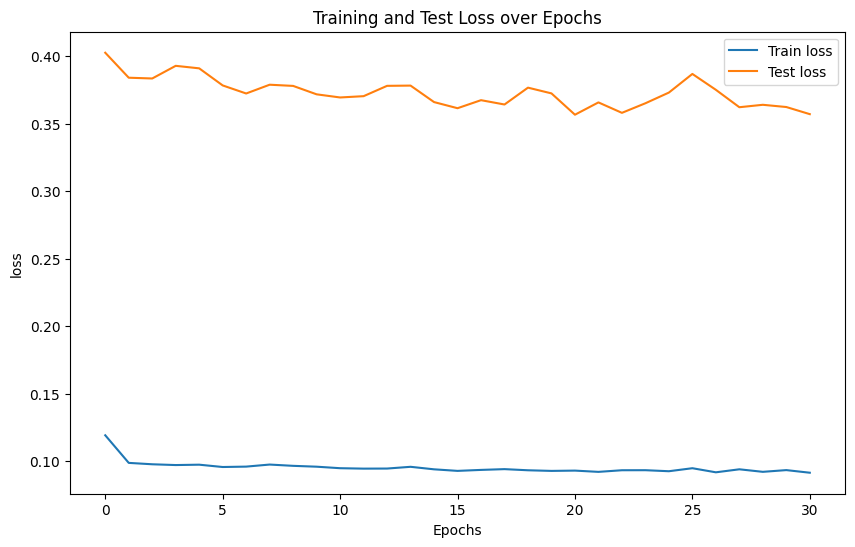

In [439]:
dropout_rate=trial.params['dropout_rate']
num_layers=trial.params['num_layers']
num_nodes=trial.params['num_nodes']
lr=trial.params['lr']
print(f'lr ={lr}')
num_features=X_train.shape[1]
num_classes=1

model= BinaryClassifierDropoutOptuna(num_features=num_features, num_classes=num_classes, 
                                 dropout_rate=dropout_rate, num_layers=num_layers, num_nodes=num_nodes)

# Initialize Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)
# Train using optimizer_sgd
train_and_evaluate_model(model, optimizer, epochs=500, print_every=10,patience=10)

In [ ]:
check out my blog on this project here :- 